# Исследование компьютерных игр

В нашем распоряжении данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные за 2016 год. Перед нами задача: спланировать кампанию на 2017-й год. (Нужно отработать принцип работы с данными). Данные за 2016 год могут быть неполными.

***Важно:*** В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Откроем файл с данными и изучим общую информацию 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [3]:
data = pd.read_csv('/datasets/games.csv', sep=',')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
# ищем пропуски
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

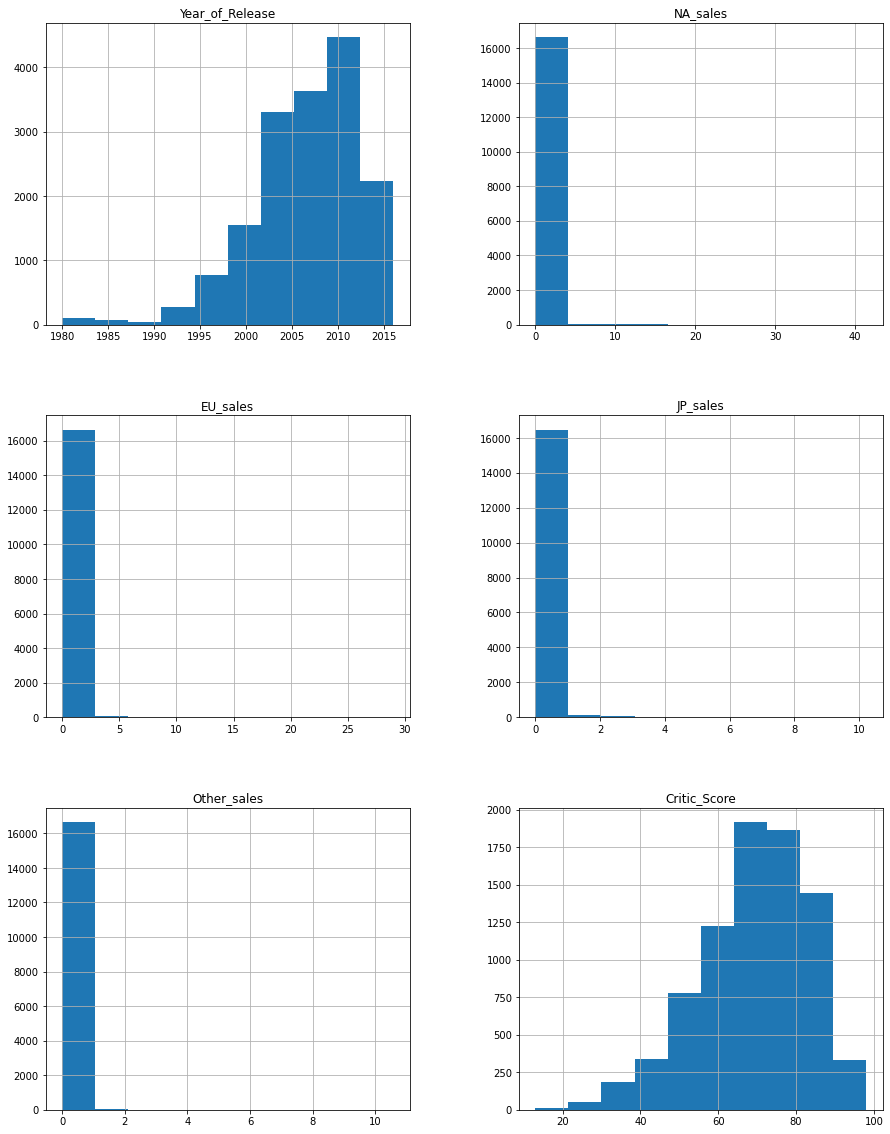

In [9]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод** В данных есть пропуски, некоторые столбцы имеют неправильное название (не по правилам snake_case),  указаны неправильные типы данных в столбцах.

Всего в таблице 16715 записей. Нужно изучить данные на выбросы, явные и неявные дубликаты.

    Name — название игры, есть 2 пропуска, object
    Platform — платформа, object
    Year_of_Release — год выпуска, 269 пропусков, float (лучше поменять на int)
    Genre — жанр игры, 2 пропуска, object
    NA_sales — продажи в Северной Америке (миллионы проданных копий), float
    EU_sales — продажи в Европе (миллионы проданных копий), float
    JP_sales — продажи в Японии (миллионы проданных копий), float
    Other_sales — продажи в других странах (миллионы проданных копий), float
    Critic_Score — оценка критиков (максимум 100), 8578 пропусков (больше половины, посмотрим далее на характер пропусков), float
    User_Score — оценка пользователей (максимум 10), 6701 пропусков (тоже большое количество пропусков), object (лучше поменять на float)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Пропусков 6766 (большое количество пропусков), object.

### Предобработка данных

#### Заменим названия столбцов (приведем их к нижнему регистру), приведем к нижнему регистру значения в столбцах name, platform, genre, rating.

In [10]:
data.columns = data.columns.str.lower()

list_of_names = ['name', 'platform', 'genre', 'rating']

for one_name in list_of_names:
    data[one_name] = data[one_name].str.lower()

display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Привели в нижний регистр для удобства и поиска дубликатов.

#### Преобразуем данные в нужные типы, но перед этим обработаем пропуски.

Значения в столбце year_of_release (год выпуска, 269 пропусков, float) поменяем на int, т.к. год не может быть не целым числом.
Также заменим значения в столбике user_score на float из object, потому что оценка - это число, возможно не целое, поэтому float.

Будем изучать столбцы с пропущенными значениями по очереди. Начнем со столбца name.

In [11]:
data['name'].isna().sum()

2

In [12]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У этих двух игр без названия нет также многих других значений. Без названий игр мы не сможем проанализировать данные, поэтому 2 безыменных игры можем удалить.

In [13]:
data.dropna(subset=['name'], inplace=True)

In [14]:
data['name'].isna().sum()

0

Перейдем к столбцу genre.

In [15]:
data['genre'].isna().sum()

0

Кажется, что 2 игры без названия не имели еще и жанров. Игры без названий мы удалили еще в предыдущем шаге. Можем двигаться дальше. Посмотрим на столбец с годом релиза игры year_of_release.

In [16]:
data['year_of_release'].isna().sum()

269

In [17]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В названиях некоторых фильмов есть года. Можно попробовать выделить эти года из названий, но есть проблема. Например, игра Madden NFL 2004 выпущена не в 2004, а в 2003 году. Получается, что не обязательно число, которое есть в названии игры является фактическим годом выпуска. Разница между указанным годом в названии и фактическим годом выпуска игры может быть небольшая, которая не повлияет на итоговое решение. Мы попробуем сделать по-другому.
В нашем dataframe возможно есть игры с аналогичными названиями, которые выпущены под другую платформу. Такие игры часто выпускаются в один год. 

In [18]:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('first'))

In [19]:
data['year_of_release'].isna().sum()

146

Мы спасли часть данных. Остальные пропуски, к сожалению, никак не заполнить. 146 - не так много, придется удалить, чтобы не заполнять 0.

In [20]:
data = data.dropna(subset=['year_of_release'])

In [21]:
data['year_of_release'].isna().sum()

0

Переведем данные из столбца year_of_release в тип данных int, т.к. год не может быть не целым.

In [22]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16567, dtype: int64

Обратим внимание на столбец critic_score, посмотрим пропуски в этом столбце.

In [23]:
data['critic_score'].isna().sum()

8492

In [24]:
data['critic_score'].describe()

count    8075.000000
mean       68.991950
std        13.923383
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Если мы будем заполнять пропущенные значения медианой, то это может исказить данные. Заполним данные -1, но будем помнить, что -1 обозначает отсутствие данных. (Имеем право заменить на -1, т.к. других нулей в столбце нет, минимальное значение - 13).

In [25]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [26]:
data['critic_score'].isna().sum()

0

Обратим внимание на столбец user_score.

In [27]:
data['user_score'].isna().sum()

6633

Пропущенных значений так же много, как и в столбце critic_score.

In [28]:
data['user_score'].sort_values(ascending = False).value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
0.2       2
1.3       2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Очень много значений "tbd". Аббревиатура "tbd" означает "to be defined" (=предстоит определить), то есть на данный момент это пропуск в данных. Заменим на их на NaN.

In [29]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [30]:
data['user_score'].isna().sum()

9027

Пропусков стало еще больше. Заменим их так же -1, чтобы не потерять так много значений.

In [31]:
data['user_score'] = data['user_score'].fillna(-1)

In [32]:
data['user_score'].isna().sum()

0

Не забудем перевести данные из столбца user_score в тип данных float (из object).

In [33]:
data['user_score'] = data['user_score'].astype('float', errors='ignore')
data['user_score']

0        8.0
1       -1.0
2        8.3
3        8.0
4       -1.0
        ... 
16710   -1.0
16711   -1.0
16712   -1.0
16713   -1.0
16714   -1.0
Name: user_score, Length: 16567, dtype: float64

Теперь посмотрим на столбик rating.

In [34]:
data['rating'].isna().sum()

6699

Опять куча пропусков... Посмотрим на значения, которые есть в этом столбике.

In [35]:
data['rating'].value_counts()

e       3958
t       2930
m       1554
e10+    1412
ec         8
k-a        3
rp         2
ao         1
Name: rating, dtype: int64

Все значения, которые могут быть в Entertainment Software Rating Board (ESRB).

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех» ИЛИ "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

"k-a" и "e" - это одно и то же. Изменим "k-a" на "e".

In [36]:
data['rating'] = data['rating'].replace('k-a', 'e')

In [37]:
data['rating'].value_counts()

e       3961
t       2930
m       1554
e10+    1412
ec         8
rp         2
ao         1
Name: rating, dtype: int64

Заменим NaN на "rp" ("рейтинг ожидается"), т.к. получается, что rp - неустановленный рейтинг для игры.

In [38]:
data['rating'] = data['rating'].replace(np.nan, 'rp')

In [39]:
data['rating'].isna().sum()

0

Проверим DataFrame на явные дубликаты.

In [40]:
data.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [41]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [42]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,rp,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,rp,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.0,-1.0,rp,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1.0,-1.0,rp,0.01


In [43]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000
mean,2006.488682,0.263975,0.145814,0.078020,0.047567,33.115108,2.697875,0.535376
std,5.864797,0.816474,0.505364,0.310068,0.187476,36.311166,4.170565,1.554281
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


***Вывод:*** В ходе предобработки данных были проведены следующие действия: 
1. Названия столбцов приведены к нижнему регистру. Также к нижнему регистру были приведены значения столбиков name, platform, genre, rating.
2. В столбиках 'name' и 'genre' были удалены пропущенные значения (всего их было 2 и в двух столбцах они совпадали).
3. В столбце year_of_release некоторые пропущенные значения были заменены на значения аналогичных игр, т.к. часто игра выпускается в один год на разных платформах. Остальные данные с пропущенными значениямы были удалены, т.к. их было не так много. Изменили тип данных на int (года должны быть целыми).
4. В столбцах critic_score и user_score было много пропущенных значений (количество приближалось к половине от общего количества). Такое могло получиться, потому что игры не были замечены для широкой публики, либо это могла быть ошибка в выгрузке данных. Значения в этих столбцах были заменены на -1, чтобы все данные в столбце были числовыми. В колонке user_score присутсвует абривиатура TBD (To Be Discussed) - подлежит обсуждению, то есть значит,что оценка не определена. Заменили абривиатуру на NaN, а потом на -1. Для user_score зменили тип данных на float, т.к. значение рейтинга это число, а не object.
5. В столбце rating тоже было много пропущенных значений. Пропуски заполнили значением 'rp' (рейтинг ожидается), т.к. такое значение есть у ESRB. Значение "k-a" и "e" - это одно и то же, поэтому заменили "k-a" на "e".
6. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.
7. Явных дубликатов в данных нет.

### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Ответим на вопрос: "Важны ли данные за все периоды?"

In [45]:
data['year_of_release'].sort_values(ascending=False).value_counts()

2008    1441
2009    1430
2010    1269
2007    1202
2011    1153
2006    1019
2005     947
2002     845
2003     783
2004     764
2012     662
2015     606
2014     581
2013     548
2016     502
2001     486
1998     380
2000     351
1999     339
1997     289
1996     263
1995     219
1994     122
1993      60
1981      46
1992      43
1991      42
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [46]:
data['year_of_release'].sort_values(ascending=False).value_counts().describe()

count      37.000000
mean      447.756757
std       455.716920
min         9.000000
25%        36.000000
50%       339.000000
75%       764.000000
max      1441.000000
Name: year_of_release, dtype: float64

Построим гистограмму для наглядности. Посмотрим распределение по годам.

In [47]:
# считаем bins
data['year_of_release'].sort_values(ascending=False).value_counts().count()

37

Text(0.5, 1.0, 'Количество игр по годам \n')

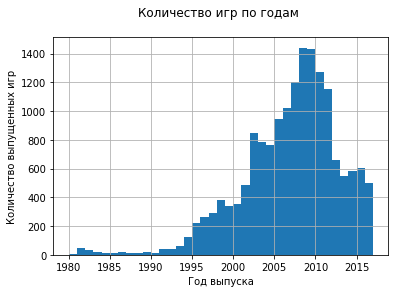

In [48]:
data.hist('year_of_release', bins=37, range=(1980, 2017))
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.title('Количество игр по годам \n')

Text(0.5, 1.0, 'Количество игр по годам \n')

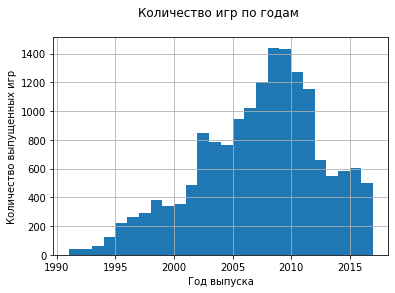

In [49]:
data.hist('year_of_release', bins=26, range=(1991, 2017))
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.title('Количество игр по годам \n')

Подтвердим наши выводы, построим более наглядный график.

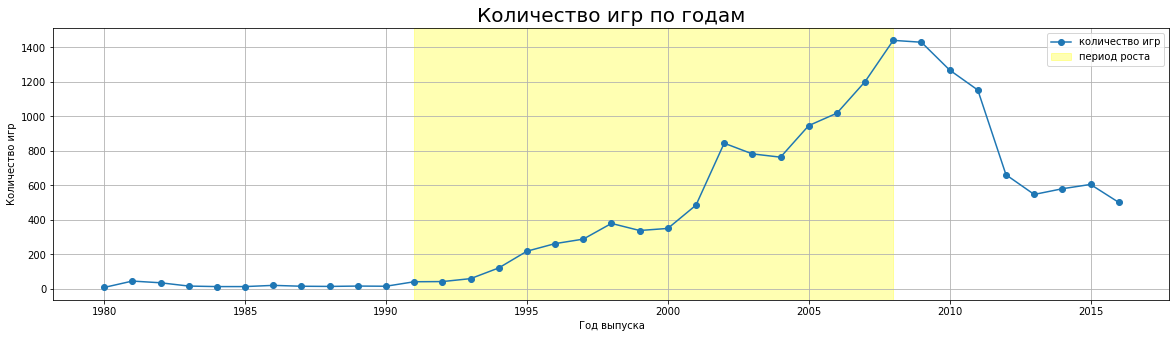

In [50]:
plt.figure(figsize=(20, 5))
plt.title('Количество игр по годам', fontsize=20)
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.plot(data.groupby('year_of_release')['name'].count(), 'o-', label='количество игр', alpha=1)
plt.axvspan(1991, 2008, color='yellow', label='период роста', alpha=0.3)
plt.grid(True)
plt.legend()

До 1991 года количество игр было примерно одинаковым, после 1991 увеличилось количество выпускаемых игр. В 2008-2009 годaх был пик, потом количество выпускаемых игр пошло на спад. Скорее всего повлиял мировой кризис, который начался в 2008 году. Нам важны данные про игры, начиная с 1991 года.

Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: "За какой характерный срок появляются новые и исчезают старые платформы?"

In [51]:
#Посчитаем суммарные продажи по платформам и возьмем первые 10 платформ с максимальными продажами
platform_sales = (data
                  .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                  .sort_values(by='total_sales', ascending=False)
                  .head(10)
                  .reset_index()
                 )
platform_sales

,platform,total_sales
0,ps2,1247.16
1,x360,966.61
2,ps3,935.19
3,wii,903.31
4,ds,804.28
5,ps,727.58
6,ps4,314.14
7,gba,313.73
8,psp,293.57
9,pc,258.86


In [52]:
platform_sales['platform'].unique()

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', 'pc'],
      dtype=object)

Посмотрим, сколько игр выпускалось в разные годы.

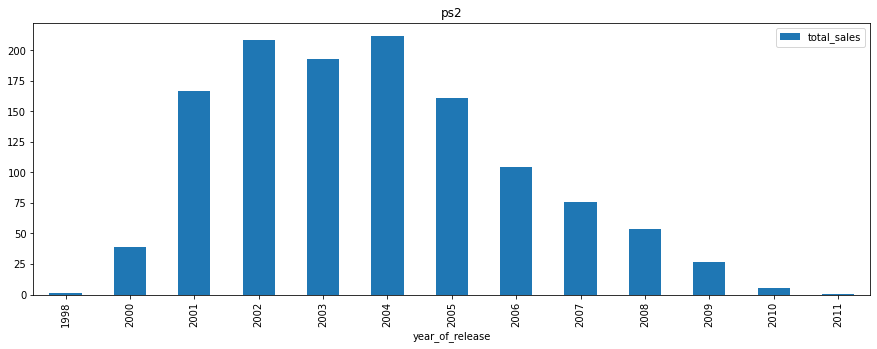

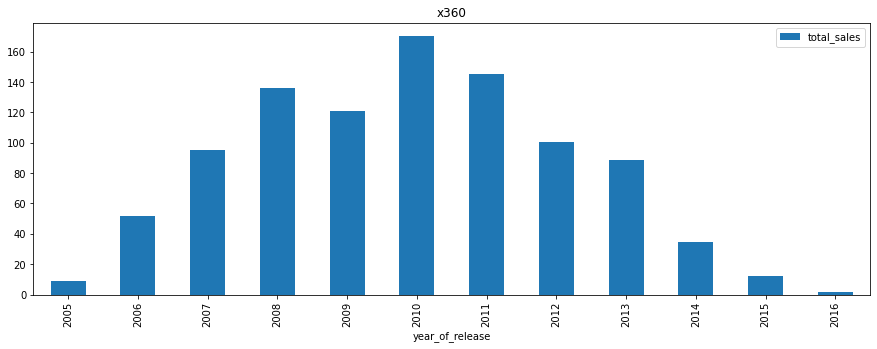

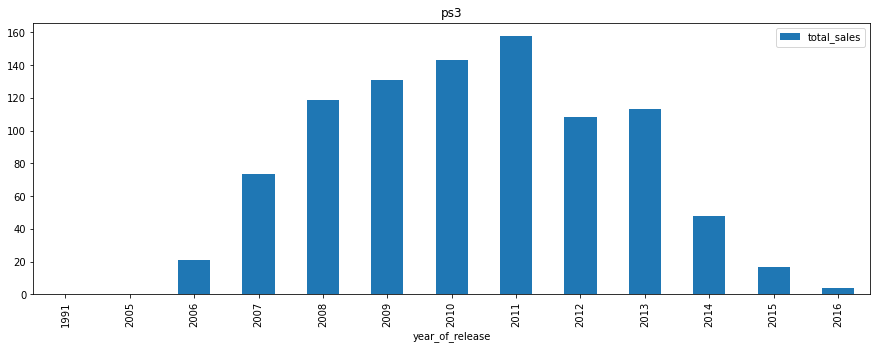

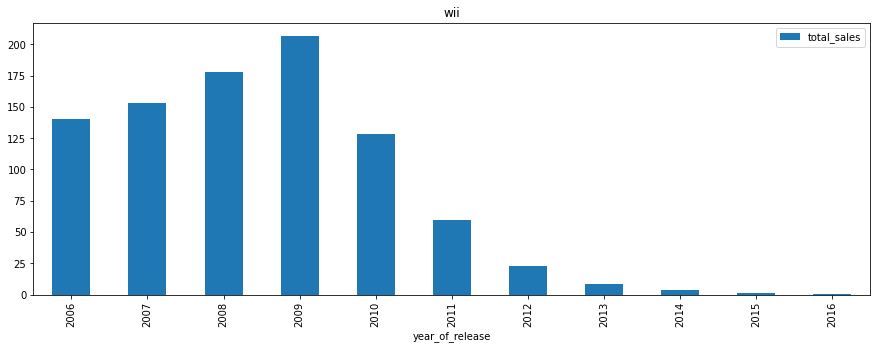

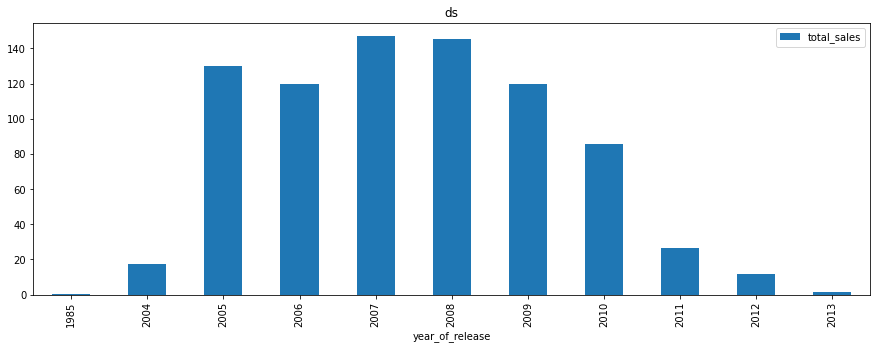

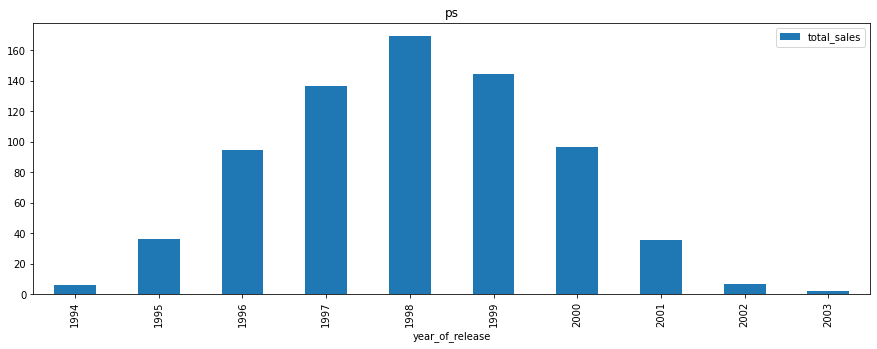

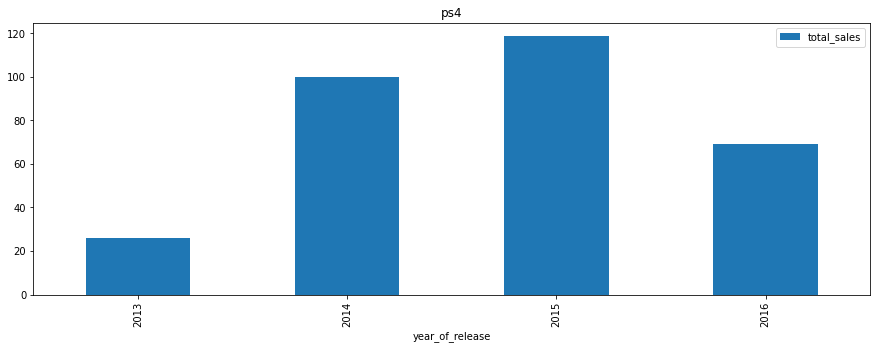

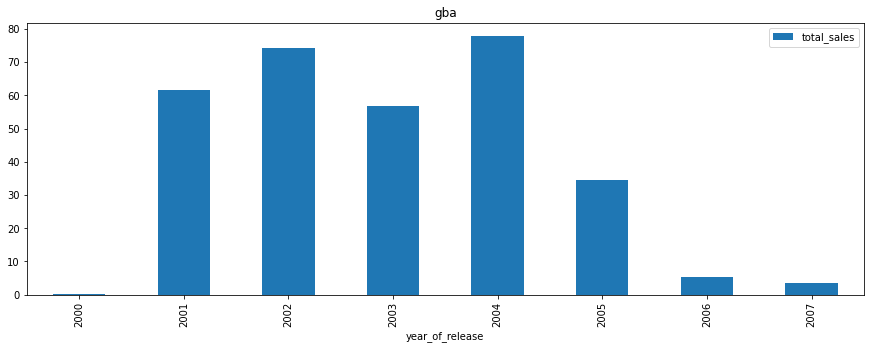

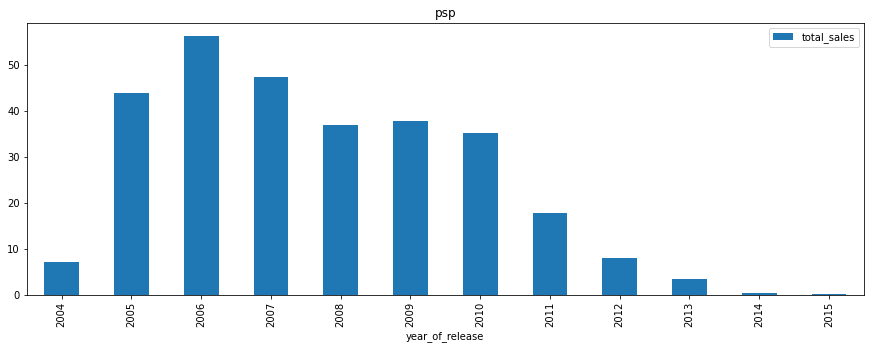

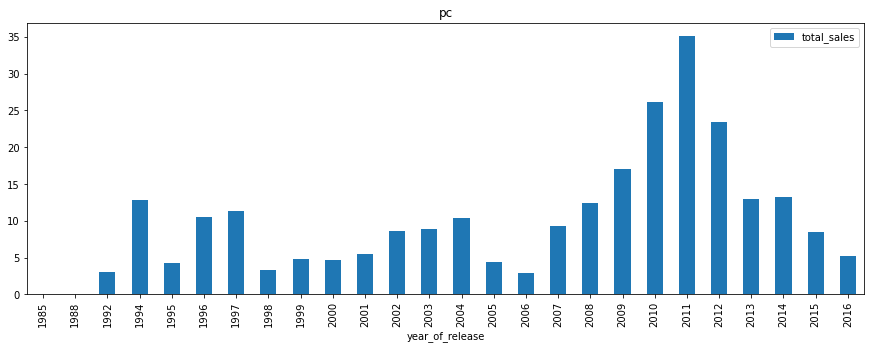

In [53]:
#построим распределение по годам для 10 самых больших платформ
for platform in platform_sales['platform'].unique():
    (data[data['platform'] == platform]
         .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
         .plot(kind='bar', figsize=(15,5))
    )
    plt.title(platform)

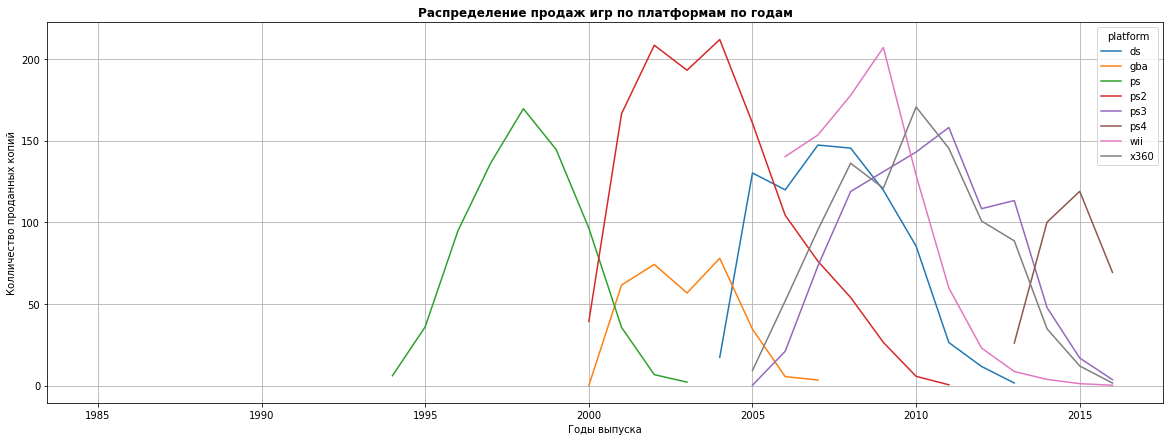

In [58]:
# код ревьюера

# выделили топ8 платформ
test_top = (data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()
                .sort_values(by = 'total_sales', ascending = False).head(8))['platform']

(data
    .query('platform in @test_top')
    .pivot_table(index=['year_of_release'], columns='platform', values=['total_sales'], aggfunc='sum')
    .reset_index()
    .plot(x='year_of_release', y='total_sales', kind='line', grid=True, figsize=(20, 7))
)

plt.title('Распределение продаж игр по платформам по годам', fontweight="bold")
plt.xlabel('Годы выпуска')
plt.ylabel('Колличество проданных копий')
plt.show()

Средний возраст платформ, входящих в топ-10 - 10 лет. Чтобы сделать прогноз для 2017 года возьмем актуальный период - с 2009 (начало спада) по 2016 года.

Сделаем срез из актуальных данных, начиная с 2009 года. Определим, какие платформы лидируют по продажам или наоборот испытывают трудности с продажами. Посмотрим на 10 акутальных платформ.

In [53]:
data_actual = data.query('year_of_release >= 2009')
actual_data_sales = (data_actual
               .pivot_table(index='platform', values='total_sales', aggfunc='sum')
               .sort_values(by='total_sales', ascending=False)
               .head(10)
               .reset_index()
              )
actual_data_sales

,platform,total_sales
0,ps3,721.58
1,x360,674.12
2,wii,432.03
3,ps4,314.14
4,3ds,258.51
5,ds,244.45
6,xone,159.32
7,pc,141.87
8,psp,102.33
9,wiiu,82.19


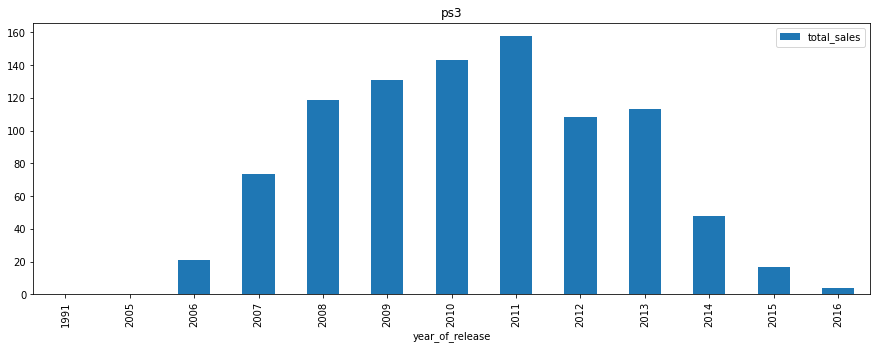

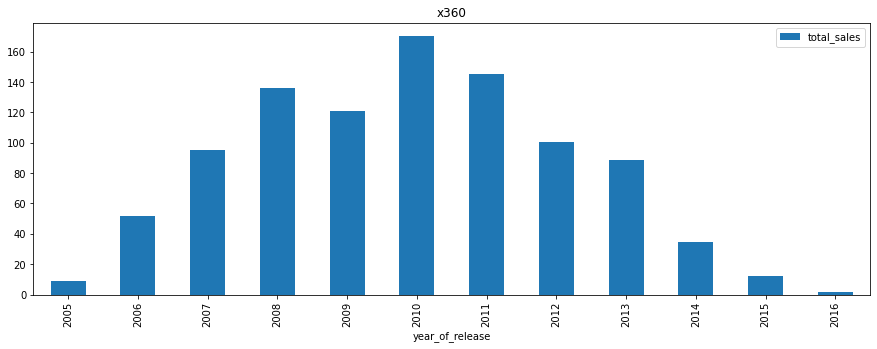

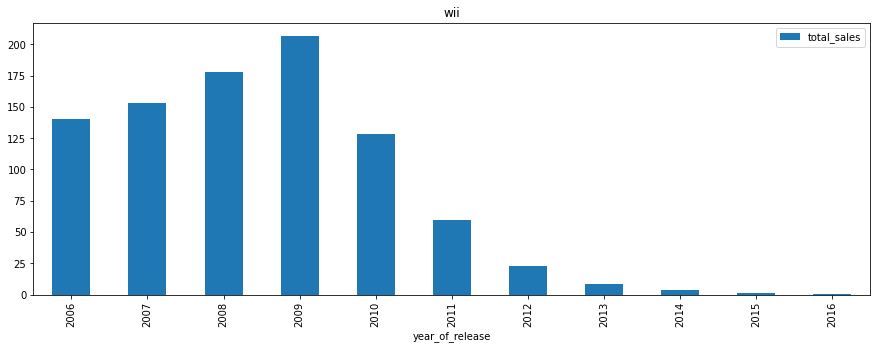

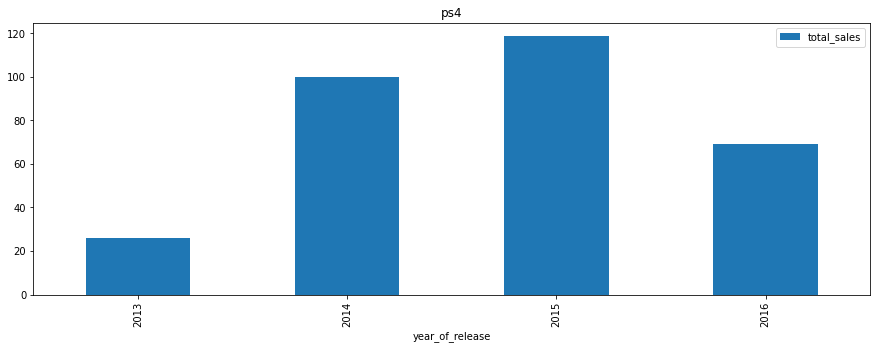

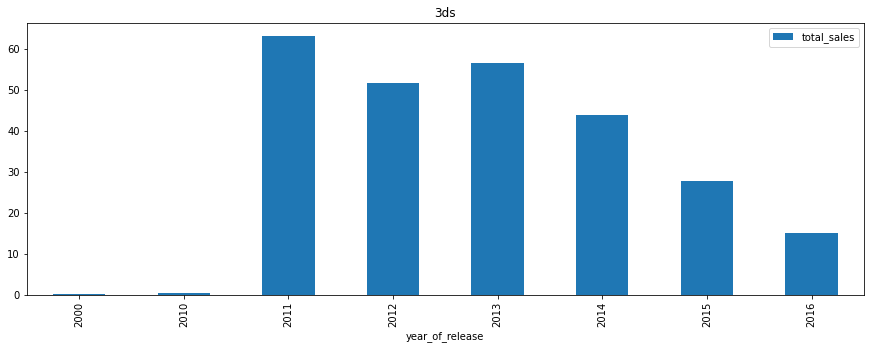

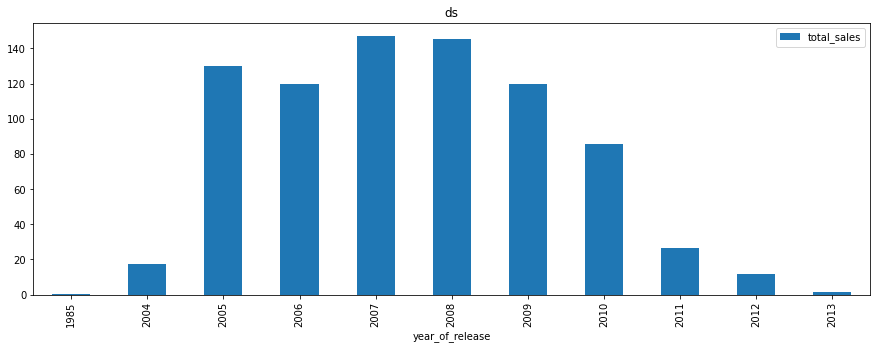

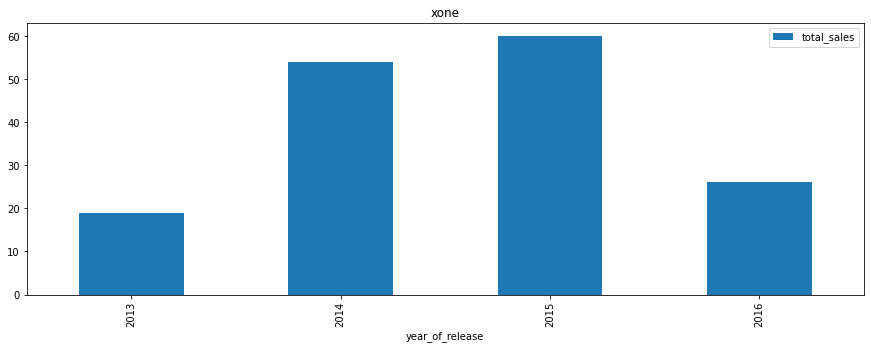

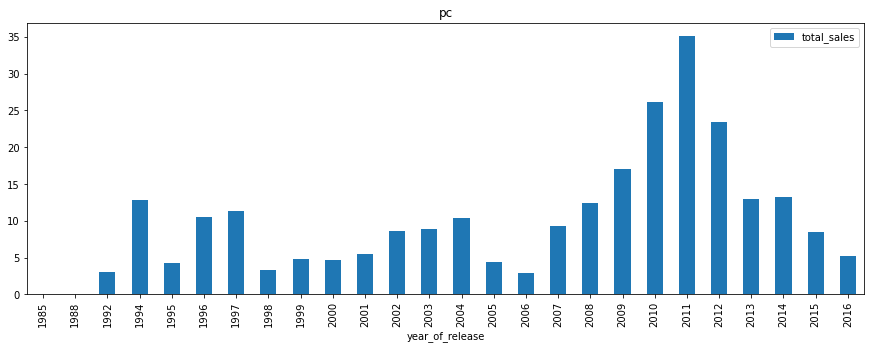

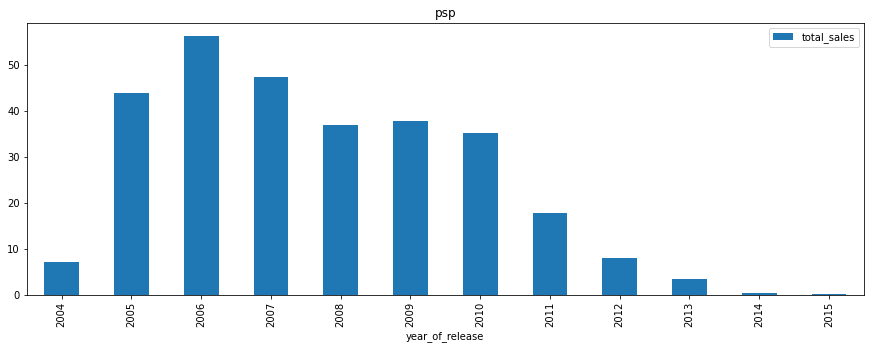

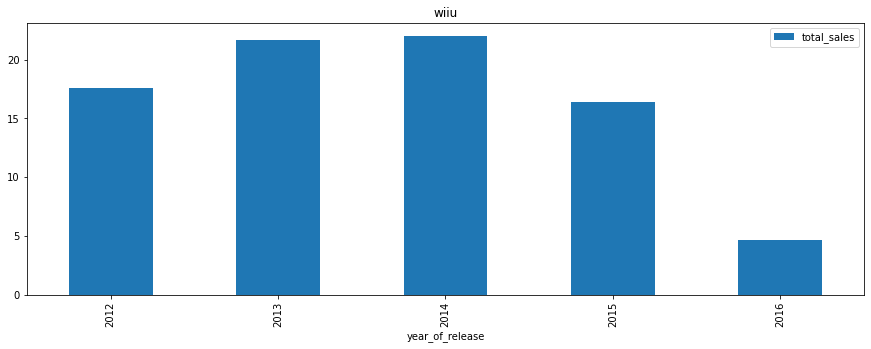

In [54]:
actual_data_top = actual_data_sales['platform'].unique()
for platform in actual_data_top:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)

По всем платформам продажи падают. Это подтверждается еще общим графиком по всем периодам (с 2008-2009 годов начался спад). По продажам лидируют: ps3, x360, wii, ps4, 3ds. Самым стабильным и долгоживущим устройством, как ни странно, является компьютер (pc). Хоть pc и занимает 7 место, но является стабильной платформой, на которую можно выпускать игры. Лидером является ps3. На 4 месте расположился ps4. Можно считать, что ps4 - наследник ps3, который перетягивает на себя потенциальных покупателей ps3. Похоже на стабильность.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

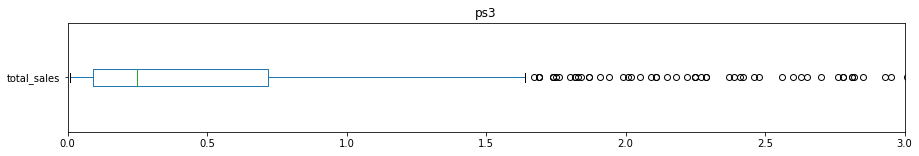

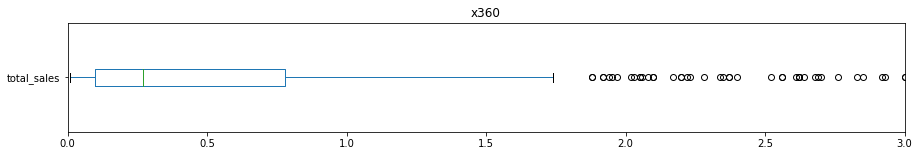

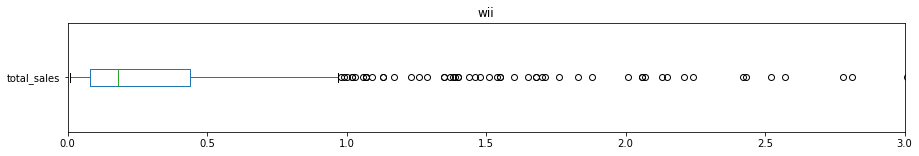

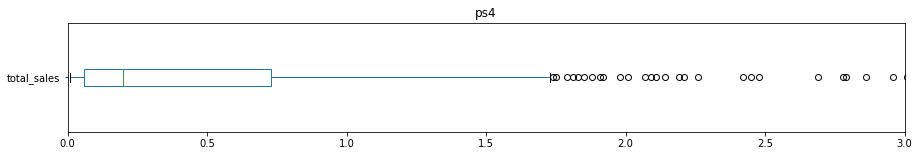

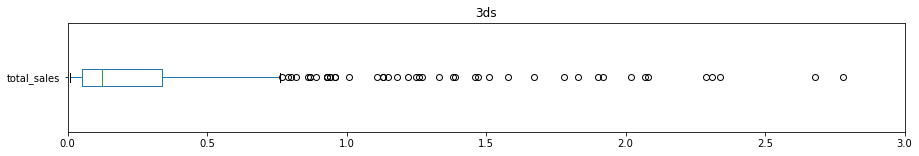

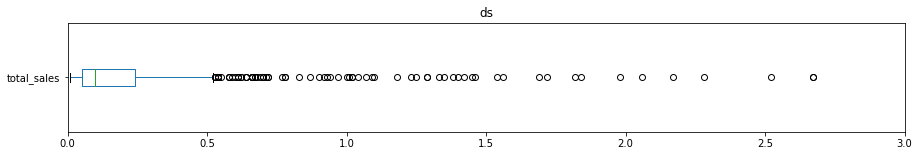

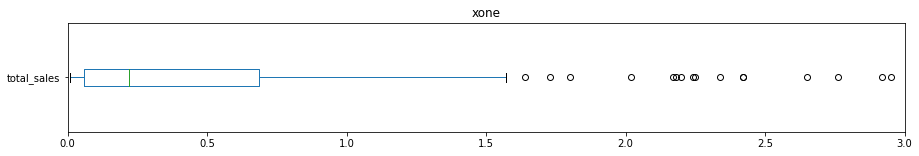

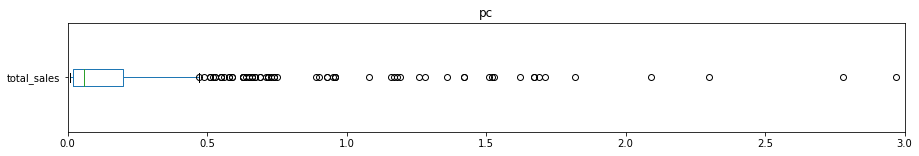

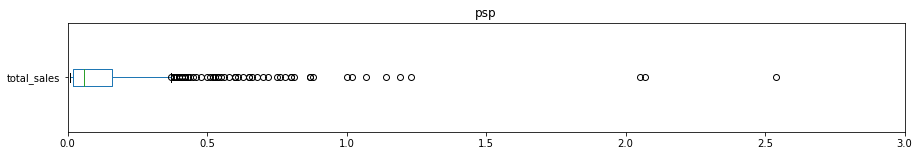

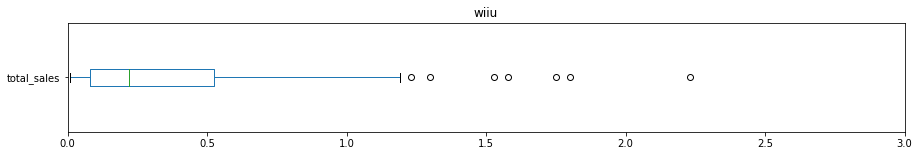

In [55]:
for platform in actual_data_top:
    data_actual[data_actual['platform'] == platform].plot(y='total_sales', kind='box', vert=False, figsize=(15,2))
    plt.xlim(0, 3) 
    plt.title(platform)

Выбросы могут говорить, что у топовых платформ были игры, которые выстреливали. Выбросы находятся за пределами усов. На диаграммах выше видно, что таких выбрасов достаточно много. Такие выбросы могли компенсировать убытки от выпуска неудачных игр. У ps3, ps4, x360, xone и wiiu длинные усы, что может говорить о большом количестве продаж. Медиана так же находится дальше, чем у остальных платформ. Это значит, что средняя и медиана у этих платформ тоже больше.

Посмотрим, как влияют на продажи внутри ps3 отзывы пользователей и критиков.

In [56]:
data_ps3 = (data_actual
            .query('platform == "ps3"')
            .filter(['total_sales', 'critic_score', 'user_score'])
           )

Посмотрим корреляцию для ps3.

In [57]:
data_ps3.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.347256,0.264105
critic_score,0.347256,1.000000,0.815791
user_score,0.264105,0.815791,1.000000


Визуализируем нашу корреляцию.

<AxesSubplot:>

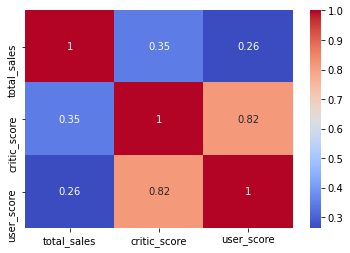

In [58]:
sns.heatmap(data_ps3[['total_sales', 'critic_score', 'user_score']].corr(), annot=True, cmap= 'coolwarm')

Положительная корреляция для платформы ps3 есть между critic_score и user_score. Практически нет связи между продажами и оценками критиков или пользователей. Однако даже если сравнивать, что больше влияет на продажи, то это будут оценки критиков, а не пользователей. Не стоит забывать, что у нас было большое количество пропусков (около половины). Отстуствие такого большого количества данных могло повлиять на результат.

Для второго лидера по продажам наблюдается такая же тенденция, как и для ps3.

In [59]:
data_x360 = (data_actual
            .query('platform == "x360"')
            .filter(['total_sales', 'critic_score', 'user_score'])
           )

In [60]:
data_x360.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.307641,0.201945
critic_score,0.307641,1.000000,0.763421
user_score,0.201945,0.763421,1.000000


<AxesSubplot:>

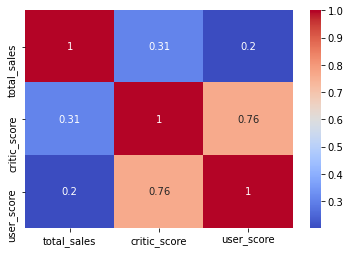

In [61]:
sns.heatmap(data_x360[['total_sales', 'critic_score', 'user_score']].corr(), annot=True, cmap= 'coolwarm')

Посмотрим на общее распределение игр по жанрам.

In [62]:
genre_actual = (data_actual
                .pivot_table(index='genre', values='total_sales', aggfunc='sum')
                .sort_values(by='total_sales', ascending=False)
               )
genre_actual

,total_sales
genre,
action,818.37
shooter,552.01
sports,466.80
role-playing,362.64
misc,310.86
platform,160.25
racing,156.37
fighting,113.63
simulation,105.00


<AxesSubplot:xlabel='genre'>

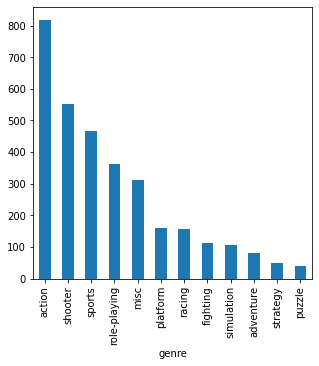

In [63]:
genre_actual.plot(y='total_sales', kind='bar', legend = False, figsize = (5,5))

Самые популярные жанры - action, shooter, sports. Именно эти жанры приносят больше всего прибыли компаниям. Самые непопулярные - strategy, puzzle. 

***Вывод:*** По всем данным можно сделать следующие выводы:
1. Средний срок жизни платформы - 10 лет.
2. До 1991 года была стагнация по выходу игр, далее до 2008-2009 годов был рост по количеству выпущенных игр в год. После 2009 года начался спад. Скорее всего на спад повлиял мировой кризис.
3. Количество выпускаемых игр продолжает падать. Чтобы сделать актуальный прогноз для 2017 года необходимо брать данные с 2009 года. Именно тогда начался спад в релизах.
4. PC - самая постоянная платформа, т.е. существет дольше всех, хотя и имеет непостоянные данные (то рост, то спад). Компьютеры покупают не только для игр, поэтому для выпускать игры для компьютеров выгоднее.
5. PS, PS3 и PS4 переманивают пользователей с более старых версий платформ на более новые, что позволяет находиться в топе и PS3, и PS4.
6. Мнения критиков и пользователей не влияют на продажи. Однако, если сравнивать между отзывами критиков и отзывами пользователей, то отзывы критиков имеют больший вес.
7. Самые популярные жанры - action, shooter, sports. Именно эти жанры приносят больше всего прибыли компаниям. Самые непопулярные - strategy, puzzle. 

### Составим портрет пользователя каждого региона

Самые популярные платформы (топ-5) для каждого региона.

In [64]:
top_platform_na = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(top_platform_na.head(5))

top_platform_eu = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
display(top_platform_eu.head(5))

top_platform_jp = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(top_platform_jp.head(5))

,na_sales
platform,
x360,410.19
ps3,293.12
wii,237.23
ds,121.37
ps4,108.74


,eu_sales
platform,
ps3,256.14
x360,197.81
ps4,141.09
wii,124.66
pc,84.05


,jp_sales
platform,
3ds,100.62
ps3,68.39
ds,52.11
psp,50.63
wii,34.32


В Америке и Европе первые места делят ps3 и x360. В Японии другой рынок. На первом месте 3ds (от японской компании Nintendo), а уже на 2м месте - ps3.

Посмотрим топ жанров по регионам.

In [65]:
top_genre_na = data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(top_genre_na.head(5))

top_genre_eu = data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
display(top_genre_eu.head(5))

top_genre_jp = data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(top_genre_jp.head(5))

,na_sales
genre,
action,365.34
shooter,277.63
sports,228.34
misc,164.52
role-playing,130.83


,eu_sales
genre,
action,274.98
shooter,193.63
sports,158.76
misc,86.37
role-playing,83.56


,jp_sales
genre,
role-playing,120.66
action,84.17
misc,30.34
sports,25.32
platform,20.65


Самые популярные жанры в Америке и Европе - это action и shooter. В Японии опять обстоят дела по-другому. Shooter вообще не входит в топ-5, а первое место занимает не action, а role-playing.

Узнаем, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [66]:
rating_sale_na = data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(rating_sale_na)

rating_sale_eu = data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
display(rating_sale_eu)

rating_sale_jp = data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(rating_sale_jp)

,na_sales
rating,
m,443.10
e,404.47
t,227.58
e10+,205.17
rp,191.22
ec,1.32


,eu_sales
rating,
m,328.96
e,261.78
rp,166.33
t,153.56
e10+,123.51
ec,0.00


,jp_sales
rating,
rp,198.80
e,61.49
t,50.62
m,35.66
e10+,20.82
ec,0.00


В Америке и Европе на первых и вторых местах - «M» («Mature») и «E» («Everyone»). Жанры для взрослых и для всех имеют большую аудиторию (что логично). В Японии много rp (рэйтинг уточняется). Как мы поним, пробелы мы заполняли rp. Возможно японцы не говорят жанры, которые им нравятся, но скорее всего произошла ошибка в выгрузке данных. На вторых и третьих местах стоят «E» («Everyone») и «T» («Teen»). Похоже для разработчиков из Японии важно захватить большую аудиторию.

***Вывод:*** Рынок Америки и Европы не сильно отличается друг от друга. В Америке и Европе первые места делят ps3 и x360. В Японии другой рынок. На первом месте 3ds (от японской компании Nintendo), а уже на 2м месте - ps3. Самые популярные жанры в Америке и Европе - это action и shooter. В Японии опять обстоят дела по-другому. Shooter вообще не входит в топ-5, а первое место занимает не action, а role-playing. Что касается рейтинга, то в Америки и Европе популярны жанры «M» («Mature») и «E» («Everyone»). На первом месте по рейтингу стоит неопределенный жанр (мы меняли пропуски на неопределенный жанр rp). На втором месте в Японии игры для всех, и для тинейджеров, которые покрывают большую аудиторию.

### Проверим гипотезы

Проверим первую гипотезу.

- Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Н1: Средние пользовательские рейтинги платформ Xbox One и PC **НЕ** одинаковые

Пороговое значение будет 0.05.

Ещё в предобработке данных мы заменили пропуски значением -1.

Выборки оценок по платформам XOne и PC не связаны друг с другом. Для расчёта статистики разности и p-value воспользуемся критерием Стьюдента (st.ttest_ind).

In [89]:
# удалим пропуски, сохраним данные в новых переменных
xone = data_actual.query('platform == "xone" and user_score != -1')['user_score']
pc = data_actual.query('platform == "pc" and user_score != -1')['user_score']

In [90]:
alpha = 0.05

results = st.ttest_ind(
            xone, pc)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза не может быть отвергнута')

Нулевая гипотеза не может быть отвергнута


Сравним средние, если не можем отвергнуть нулевую гипотезу.

In [91]:
display(f'{xone.mean()} и {pc.mean()}')

'6.521428571428572 и 6.661456102783726'

**Вывод:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим ещё одну гипотезу.

- H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [92]:
# удалим пропуски, сохраним данные в новых переменных
action = data_actual.query('genre == "action" and user_score != -1')['user_score']
sports = data_actual.query('genre == "sports" and user_score != -1')['user_score']

In [93]:
alpha = 0.05

results = st.ttest_ind(
            action, sports)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не может быть отвергнута")

Отвергаем нулевую гипотезу


Проверим средние, чтобы точно отвергнуть нудевую гипотезу.

In [94]:
display(f'{action.mean()} и {sports.mean()}')

'6.823523206751054 и 6.103491271820449'

**Вывод:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») тоже одинаковые. Гипотезы проверяли с помощью распределения Стьюдента.

### Общий вывод

Были изучены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в 2017 году.

Какие этапы были пройдены:
1. Предобработка данных.
- Названия столбцов, а так же данные типа object были приведены к нижнему регистру. Данные в столбце year_of_release были переведены из типа данных float в тип данных int. Данные в столбце user_score были переведены из типа object в тип данных float. 
- В столбцах name и genre были благополучно удалены 2 строки, с пропущенными данными, т.к. без названия делать с этими строками нечего.
- В столбце year_of_release было 269 пропусков. Их можно было удалить, т.к. они составляли малую часть от общей выборки. Однако часть данных мы смогли восстановить, т.к. часто игры выходят в один год для разных платформ. Остальные строки с пропусками пришлось удалить.
- Большое количество пропусков было в столбцах critic_score, user_score и rating (около половины от всего объема данных). В critic_score и user_score пропуски были заменены на -1, чтобы не потерять бОльшую часть данных и продолжать с ними работать. В столбце rating пропуски были заменены на значение 'rp' (=рейтинг уточняется), т.к. в таблице было уже такое значение (всего 2 строки, в которые мы добавили пропуски). В столбце user_score было много значений 'tbc', что значит "уточняется". По факту - тоже пропуск. Заменили это значение на -1.

2. Исследовательский анализ данных.
- Средний срок жизни платформы - 10 лет.
- До 1991 года была стагнация по выходу игр, далее до 2008-2009 годов был рост по количеству выпущенных игр в год. После 2009 года начался спад. Скорее всего на спад повлиял мировой кризис.
- Количество выпускаемых игр продолжает падать. Чтобы сделать актуальный прогноз для 2017 года необходимо брать данные с 2009 года. Именно тогда начался спад в релизах.
- PC - самая постоянная платформа, т.е. существет дольше всех, хотя и имеет непостоянные данные (то рост, то спад). Компьютеры покупают не только для игр, поэтому для выпускать игры для компьютеров выгоднее.
- PS, PS3 и PS4 переманивают пользователей с более старых версий платформ на более новые, что позволяет находиться в топе и PS3, и PS4.
- Мнения критиков и пользователей не влияют на продажи. Однако, если сравнивать между отзывами критиков и отзывами пользователей, то отзывы критиков имеют больший вес.
- Самые популярные жанры - action, shooter, sports. Именно эти жанры приносят больше всего прибыли компаниям. Самые непопулярные - strategy, puzzle.

3. Портрет пользователя каждого региона.
 
 В столбцах было всего 3 региона: Америка, Европа и Япония. Рынок Америки и Европы не сильно отличается друг от друга. В Америке и Европе первые места делят ps3 и x360. В Японии другой рынок. На первом месте 3ds (от японской компании Nintendo), а уже на 2м месте - ps3. Самые популярные жанры в Америке и Европе - это action и shooter. В Японии опять обстоят дела по-другому. Shooter вообще не входит в топ-5, а первое место занимает не action, а role-playing. Что касается рейтинга, то в Америки и Европе популярны жанры «M» («Mature») и «E» («Everyone»). На первом месте по рейтингу стоит неопределенный жанр (мы меняли пропуски на неопределенный жанр rp). На втором месте в Японии игры для всех, и для тинейджеров, которые покрывают большую аудиторию. Можно сделать вывод, что игроки в Америке и Европе практически идентичны, а пользователи в Японии отдают предпочтения японскому производителю (Nintendo -> 3ds) и любят классический для Японии жанр role-playing.


4. Проверка гипотез.

 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») тоже одинаковые. Гипотезы проверяли с помощью распределения Стьюдента, т.к. выборки не были связаны между собой. Пороговое значение было 0.05.